In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns



# preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from nltk import FreqDist


# vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,f1_score


In [8]:
lemma=WordNetLemmatizer()

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


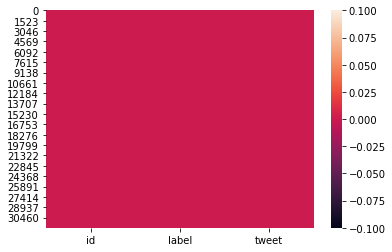

In [4]:
sns.heatmap(train.isnull())

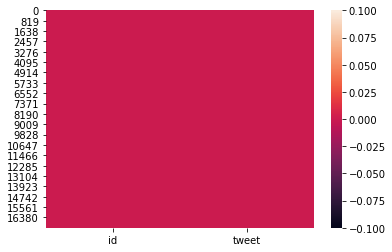

In [5]:
sns.heatmap(test.isnull())

In [97]:
def normalizer(tweets):
#     expr='@\S+|#\S+|[^A-Za-z]+'
#     tweets=re.sub(expr,' ',tweets)
    tweets = " ".join(filter(lambda x: x[0]!= '@', tweets.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweets)
    tweets=tweets.lower()
    tweets=tweets.split()
    tweets=[twt for twt in tweets if twt not in stopwords.words('english')]
    tweets=[lemma.lemmatize(word) for word in tweets]
    tweets=' '.join(tweets)
    return tweets

In [98]:
normalizer('#Rishav and @paudel are good #guyz')

'rishav good guyz'

In [99]:
df1=train.copy()


In [100]:
df1['normalized_text']=df1.tweet.apply(normalizer)

In [101]:
df1.head()

,id,label,tweet,normalized_text
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society motivation


In [110]:
def hashtag_tweet(tweet):
    tweets=' '.join(filter(lambda x: x[0]=='#',tweet.split()))
    tweets=re.sub('[^A-Za-z]',' ',tweets)
    tweets=tweets.lower()
    tweets=[lemma.lemmatize(word) for word in tweets]
    tweets=''.join(tweets)
    return tweets
    

In [113]:
hashtag_tweet('my name is #rishav, #paudel').split()

['rishav', 'paudel']

In [114]:
df1['hashtag']=df1.tweet.apply(hashtag_tweet)

In [115]:
df1.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [116]:
df2=df1.copy()

In [124]:
df2.head()

,id,label,tweet,normalized_text,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit use cause offer wheelchair ...,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesty,
3,4,0,#model i love u take with u all the time in ...,model love u take u time ur,model
4,5,0,factsguide: society now #motivation,factsguide society motivation,motivation


In [120]:
all_words=' '.join(df2.normalized_text)

In [121]:
len(all_words)

1700028

In [122]:
hatred_words=' '.join(df2[df2['label']==1].normalized_text)

In [129]:
hatred_words[:100]

'cnn call michigan middle school build wall chant tcot comment australia opkillingbay seashepherd hel'

In [130]:
len(hatred_words)

129320

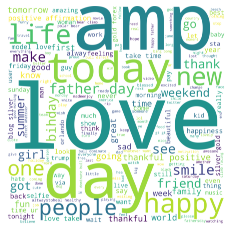

In [136]:
wordcloud=WordCloud(height=4000,width=4000,stopwords=STOPWORDS,
                   background_color='white')
wordcloud=wordcloud.generate(all_words)
pl.imshow(wordcloud)
pl.axis('off')
pl.show()